Shireeshma Parepalli

Dataset is chosen from https://archive.ics.uci.edu/ml/datasets/Wine for performing  KNN algorithm.
I choose this dataset as it has multi-class classification problem which is used to perform KNN algorithm. We can build a model to classify the type of cultivar. 
What type of data is suitable for performing KNN algorithm?
•	Data that does not require any assumptions on underlying data distribution.
•	Data which is low-dimensional is suitable for KNN algorithm than high dimensional data.
•	Data which is trained with data points corresponding to their classification.
•	KNN is used for data predictions using the training dataset directly.
•	KNN can be used for data with multiple classes.
 In Which situations, we can conduct this algorithm?
•	KNN is used for regression problems and also for Classification.
•	Database in which the data points are separated into several classes to predict the classification of a new sample point.
•	To make Predictions for a new instance by searching through the entire training set for the K most similar instances and summarizing the output variable for those K instances where K = the  nearest neighbors.
•	K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories as it works
on a similarity measure.


loading required libraries

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
 

The target field, called , has three possible values that correspond to the , as follows:
 wine type 1,
  wine type 2,
  wine type 3
 This data has three types of cultivar classes: 'class_0', 'class_1', and 'class_2'. 
  
All attributes are continuous.
The attributes are 
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline  

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

I choose this dataset as it has multi-class classification problem which is used to perform KNN algorithm.We can build a model to classify the type of cultivar. 


### Load Data From CSV File  

In [2]:
df = pd.read_csv('C:/Users/13017/Desktop/604/assignment 2/wine.csv')
df.head()

,Wine type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,class_0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,class_0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,class_0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,class_0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,class_0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


In [3]:
#Let's observe the shape of the dataframe.
df.shape

(178, 14)

As observed above we have 178 rows and 14 columns. The last 13 columns represent the
features and the first column represent the target/label.

In [4]:
df['Wine type'].value_counts()

class_1    71
class_0    59
class_2    48
Name: Wine type, dtype: int64

Number of Instances :
    class 0 - 59,
	class 1 - 71,
	class 2 - 48

In [5]:
df.columns

Index(['Wine type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

exploring data using visualization techniques:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ED6E73208>]],
      dtype=object)

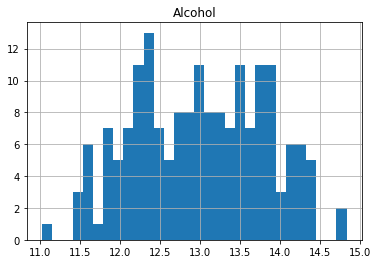

In [6]:
df.hist(column='Alcohol', bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021ED7252B38>]],
      dtype=object)

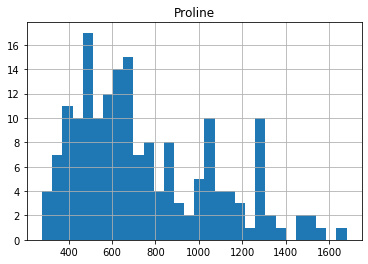

In [7]:
df.hist(column='Proline', bins=30)

We need to normalize the data as we could see that the values in Alcohol column ranges from 10 to 15 , whereas Column Proline ranges from 200 to 1700. We have different scale for these attributes. By normalizing the data,we can get the data to zero mean and unit variance.

## Normalize Data 

In [8]:
#Let's create numpy arrays for features and target
X = df.drop('Wine type',axis=1).values
y = df['Wine type'].values

### Feature set

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [10]:
y[0:5]

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0'],
      dtype=object)

### Train Test Split  
Let's split the data randomly into training and test set. 

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.


In [11]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 30% of the dataset.

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (133, 13) (133,)
Test set: (45, 13) (45,)


Let's create a classifier using k-Nearest Neighbors algorithm.



<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

In [13]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [14]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

Model Evaluation for k=5
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


we you got a classification rate of 93.33%, considered as good accuracy.

In [17]:
#now let us first observe the accuracies for different values of k.

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

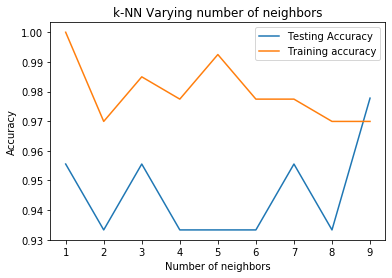

In [18]:
#### Plot  model accuracy  for Different number of Neighbors 
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=9. So lets create a KNeighborsClassifier with number of neighbors as 9.

In [38]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)

In [39]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [40]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [41]:
 #Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [42]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9777777777777777

we got a classification rate of 97.7%, considered as good accuracy.

Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [43]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [44]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [45]:
confusion_matrix(y_test,y_pred)


array([[15,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 12]], dtype=int64)

In [46]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,class_0,class_1,class_2,All
True,,,,
class_0,15,0,0,15
class_1,0,17,1,18
class_2,0,0,12,12
All,15,17,13,45


**Classification Report**

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [47]:
#import classification_report
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        15
     class_1       1.00      0.94      0.97        18
     class_2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

